<a href="https://colab.research.google.com/github/JColeman1550/BRSSPIN/blob/main/SALE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

%pip install pybaseball

import pybaseball as pyb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 415 kB 5.3 MB/s 
     |████████████████████████████████| 291 kB 49.5 MB/s 
     |████████████████████████████████| 856 kB 47.7 MB/s 


In [7]:
help(pyb)

Help on package pybaseball:

NAME
    pybaseball

PACKAGE CONTENTS
    amateur_draft
    analysis (package)
    batting_leaders
    cache (package)
    datahelpers (package)
    datasources (package)
    enums (package)
    fielding_leaders
    lahman
    league_batting_stats
    league_pitching_stats
    pitching_leaders
    playerid_lookup
    plotting
    retrosheet
    split_stats
    standings
    statcast
    statcast_batter
    statcast_fielding
    statcast_pitcher
    statcast_pitcher_spin
    statcast_running
    team_batting
    team_fielding
    team_game_logs
    team_pitching
    team_results
    teamid_lookup
    top_prospects
    utils

FILE
    /usr/local/lib/python3.7/dist-packages/pybaseball/__init__.py




In [10]:
pyb.playerid_lookup('sale', 'chris')




Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,sale,chris,519242,salec001,salech01,10603,2010.0,2021.0


In [11]:
sale = pyb.statcast_pitcher('2010-01-01', '2021-10-31', 519242)

sale.head(10)

Gathering Player Data


/usr/local/lib/python3.7/dist-packages/pybaseball/cache/cache.py:58: DtypeWarning: Columns (87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  result = func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pybaseball/cache/cache.py:58: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  result = func(*args, **kwargs)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SL,2015-10-02,78.8,3.32,5.36,"Sale, Chris",543238,519242,hit_by_pitch,hit_by_pitch,NaN,NaN,NaN,NaN,12.0,Anthony Gose hit by pitch.,R,L,L,CWS,DET,B,NaN,NaN,0,0,2015,-1.85,0.09,2.79,2.94,NaN,425543.0,NaN,0,8,Top,NaN,NaN,NaN,...,NaN,NaN,NaN,77.7,1196.0,5.5,416040,519242,452095.0,425560.0,570560.0,573135.0,493351.0,572204.0,594809.0,543776.0,50.0,NaN,NaN,0.70,1.0,0.0,0.0,NaN,54,1,Slider,2,1,1,2,1,2,1,2,Standard,Standard,NaN,-0.060,0.358
1,CH,2015-10-02,84.9,2.81,5.04,"Sale, Chris",425543,519242,double,hit_into_play,NaN,NaN,NaN,NaN,6.0,Josh Wilson doubles (3) on a line drive to lef...,R,R,L,CWS,DET,X,7.0,line_drive,0,0,2015,1.37,0.90,0.68,2.49,NaN,NaN,NaN,0,8,Top,41.82,113.93,NaN,...,146.0,76.8,13.0,83.4,1919.0,6.1,416040,519242,452095.0,425560.0,570560.0,573135.0,493351.0,572204.0,594809.0,543776.0,50.0,0.627,0.604,1.25,1.0,1.0,1.0,4.0,53,1,Changeup,2,1,1,2,1,2,1,2,Standard,Strategic,NaN,-0.149,0.631
2,SI,2015-10-02,93.0,2.81,5.32,"Sale, Chris",553988,519242,field_out,hit_into_play,NaN,NaN,NaN,NaN,12.0,Dixon Machado flies out sharply to right field...,R,R,L,CWS,DET,X,9.0,fly_ball,1,2,2015,1.13,1.39,0.76,3.83,NaN,NaN,NaN,2,7,Top,212.11,101.21,NaN,...,308.0,93.3,25.0,92.2,2266.0,6.3,416040,519242,452095.0,425560.0,570560.0,573135.0,493351.0,572204.0,594809.0,543776.0,50.0,0.207,0.263,0.00,1.0,0.0,0.0,3.0,48,5,Sinker,2,1,1,2,1,2,1,2,Standard,Strategic,NaN,0.020,-0.068
3,CH,2015-10-02,86.2,2.69,5.17,"Sale, Chris",553988,519242,NaN,foul,NaN,NaN,NaN,NaN,14.0,Dixon Machado flies out sharply to right field...,R,R,L,CWS,DET,S,NaN,NaN,1,2,2015,1.44,0.67,1.07,1.97,NaN,NaN,NaN,2,7,Top,NaN,NaN,NaN,...,NaN,NaN,NaN,84.2,1823.0,6.1,416040,519242,452095.0,425560.0,570560.0,573135.0,493351.0,572204.0,594809.0,543776.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,4,Changeup,2,1,1,2,1,2,1,2,Standard,Strategic,NaN,0.000,0.000
4,SI,2015-10-02,92.8,2.70,5.47,"Sale, Chris",553988,519242,NaN,ball,NaN,NaN,NaN,NaN,12.0,Dixon Machado flies out sharply to right field...,R,R,L,CWS,DET,B,NaN,NaN,0,2,2015,1.04,0.73,0.17,3.53,NaN,NaN,NaN,2,7,Top,NaN,NaN,NaN,...,NaN,NaN,NaN,91.5,2294.0,6.1,416040,519242,452095.0,425560.0,570560.0,573135.0,493351.0,572204.0,594809.0,543776.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,3,Sinker,2,1,1,2,1,2,1,2,Standard,Strategic,NaN,0.000,0.007
5,SI,2015-10-02,89.7,2.50,5.29,"Sale, Chris",553988,519242,NaN,called_strike,NaN,NaN,NaN,NaN,11.0,Dixon Machado flies out sharply to right field...,R,R,L,CWS,DET,S,NaN,NaN,0,1,2015,1.19,1.23,-0.97,2.97,NaN,NaN,NaN,2,7,Top,NaN,NaN,NaN,...,NaN,NaN,NaN,88.6,2211.0,6.1,416040,519242,452095.0,425560.0,570560.0,573135.0,493351.0,572204.0,594809.0,543776.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,2,Sinker,2,1,1,2,1,2,1,2,Standard,Strategic,NaN,0.000,-0.022
6,SI,2015-10-02,93.6,2.43,5.33,"Sale, Chris",553988,519242,NaN,called_strike,NaN,NaN,NaN,NaN,13.0,Dixon Machado flies out sharply to right field...,R,R,L,CWS,DET,S,NaN,NaN,0,0,2015,0.85,1.22,-0.96,2.17,NaN,NaN,NaN,2,7,Top,NaN,NaN,NaN,...,NaN,NaN,NaN,92.0,2263.0,5.9,416040,519242,452095.0,425560.0,570560.0,573135.0,493351.0,

In [17]:
sale['year'] = sale['game_date'].str[:4]

sale_starts = sale.loc[~sale['pitch_type'].isna()]

sale_seasons = sale_starts.groupby(['year','pitch_name']).agg({
    'player_name': 'size',
    'release_speed': 'mean',
    'release_spin_rate': 'mean'
})

sale_seasons = sale_seasons.reset_index()

pitch_count = sale_seasons.groupby('year').sum().reset_index()

pitch_count = pitch_count.loc[:,['year', 'player_name']]

sale_seasons = sale_seasons.merge(pitch_count,on='year')

sale_seasons['percent_thrown'] = sale_seasons['player_name_x']/sale_seasons['player_name_y']

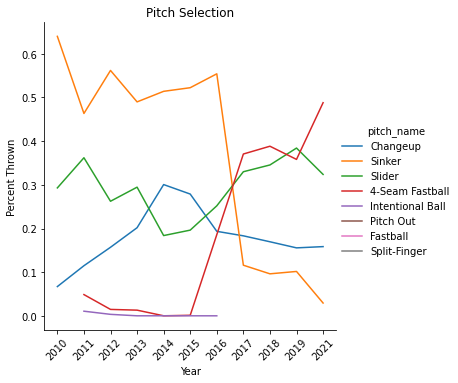

In [13]:
ax = sns.relplot(data=sale_seasons, x='year', y='percent_thrown',kind='line', hue='pitch_name')

ax.set_xticklabels(rotation=45)

ax.set(ylabel='Percent Thrown', xlabel='Year', title ='Pitch Selection');

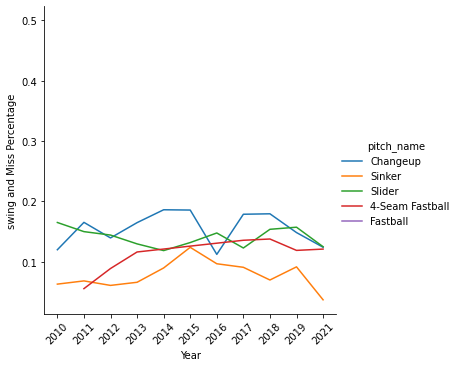

In [20]:
strikes = sale_starts.loc[sale_starts['description'] == 'swinging_strike']

strikes = strikes.groupby(['year','pitch_name']).count()

strikes = strikes.reset_index()

strikes = strikes.loc[:,['year','pitch_name','player_name','pitch_type']]

total_pitches = sale_seasons.loc[:,['year','pitch_name','player_name_x']]

strikes = strikes.merge(total_pitches,on=['year','pitch_name'])

strikes['swing_and_miss_percent'] = strikes['pitch_type'] / strikes['player_name_x']

ax = sns.relplot(data=strikes,x='year',y='swing_and_miss_percent',kind='line',hue='pitch_name')

ax.set_xticklabels(rotation=45)

ax.set(ylabel='swing and Miss Percentage', xlabel='Year')

plt.show()

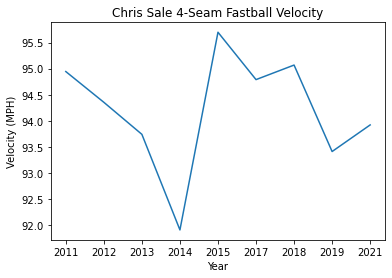

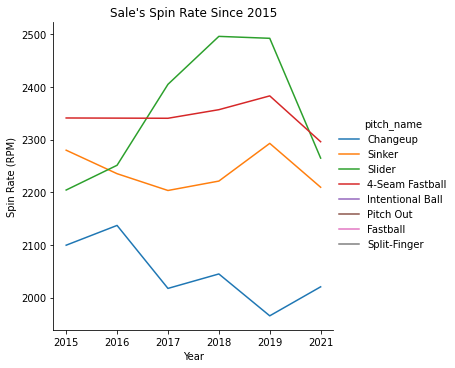

In [22]:
four_seam_fastball = sale_seasons.loc[sale_seasons['pitch_name'].str.contains('4-Seam Fastball')]

plt.plot(four_seam_fastball['year'], four_seam_fastball['release_speed'])
plt.xlabel('Year')
plt.ylabel('Velocity (MPH)')
plt.title('Chris Sale 4-Seam Fastball Velocity')

ax = sns.relplot(data=sale_seasons, x='year', y='release_spin_rate', kind='line', hue='pitch_name')
ax.set(ylabel='Spin Rate (RPM)', xlabel='Year', title="Sale's Spin Rate Since 2015")